In [1]:
import numpy as np, matplotlib.pyplot as plt
from Reg_class import FrankeFunction

n = 50
p = 5
k = 5
x = np.sort(np.random.rand(n))
y = np.sort(np.random.rand(n))

x, y = np.meshgrid(x, y)

noise = 0.1*np.random.randn(n, n)

z = FrankeFunction(x, y) + noise


x_, y_, z_ = x.reshape(n**2, 1), y.reshape(n**2, 1), z.reshape(n**2, 1)



## Fitting with train-test-split 

In [5]:
from Reg_class import Polyfit, train_test_split, MSE, R2, DesignMatrix


train, test = train_test_split(x_, y_, z_)
x, y, z = train
x_test, y_test, z_test = test
X_train = DesignMatrix(x, y, p)
X_test = DesignMatrix(x_test, y_test, p)
z_test = test[-1]
reg = Polyfit()
reg.fit(X_train, z, 'OLS')
z_pred = reg.predict(X_test)

print (MSE(z_test, z_pred), R2(z_test, z_pred))



0.011135006638752899 0.8849253911997923


In [2]:

from sklearn.model_selection import KFold

train, test = train_test_split(x_, y_, z_)
x, y, z = train
kfold = KFold(n_splits = k,shuffle=True,random_state=5)

mse = np.empty(k)
r2 = np.empty(k)
j = 0
reg = Polyfit()

for train_inds,test_inds in kfold.split(x):
    Xtrain = DesignMatrix(x[train_inds], y[train_inds], p)
    reg.fit(Xtrain, z[train_inds], 'OLS')
    Xtest = DesignMatrix(x[test_inds], y[test_inds], p)
    z_test = z[test_inds]
    z_pred = reg.predict(Xtest)
    mse[j] = MSE(z_test, z_pred)
    r2[j] = R2(z_test, z_pred)
    j += 1
print (np.mean(r2), np.mean(mse))



0.890538223165424 0.011293525178112551


In [10]:
pmax = 15
babs = np.zeros(pmax)
z_test = test[-1]
for i in range(pmax):
    X_train = DesignMatrix(x, y, i+1)
    betas = reg.fit(X_train, z, 'OLS')[0]
    babs[i] = np.mean(np.abs(betas))

P_arr = np.arange(1, pmax+1)


    

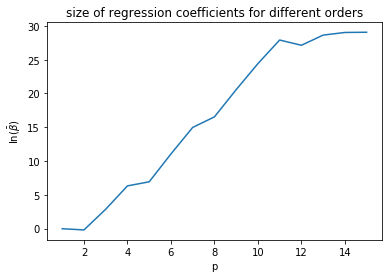

In [15]:
plt.plot(P_arr, np.log(babs))
plt.xlabel('p')
plt.ylabel(r'$\ln(\bar{\beta})$')
plt.title('size of regression coefficients for different orders')
plt.savefig('orderOLS.pdf')
plt.show()